In [363]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [364]:
import warnings
warnings.filterwarnings("ignore")

# What is K-Means Clustering?
K-Means is an unsupervised learning algorithm that:
- Divides data into K clusters
- Each cluster has a centroid (mean of points)
- Algorithm minimizes the intra-cluster distance

## K-Means Clustering using Scikit-Learn 

In [365]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [366]:
x, y = make_blobs(n_samples=1000, n_features=2, centers=3)

In [367]:
x

array([[-5.32102661,  1.93663747],
       [ 3.29855694, -5.90892207],
       [ 5.05656025, -7.32566117],
       ...,
       [ 1.42060039,  2.02497789],
       [ 0.45526664,  2.53131049],
       [-6.10175664,  1.45455517]])

In [368]:
y

array([1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1,
       1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0,
       0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1,

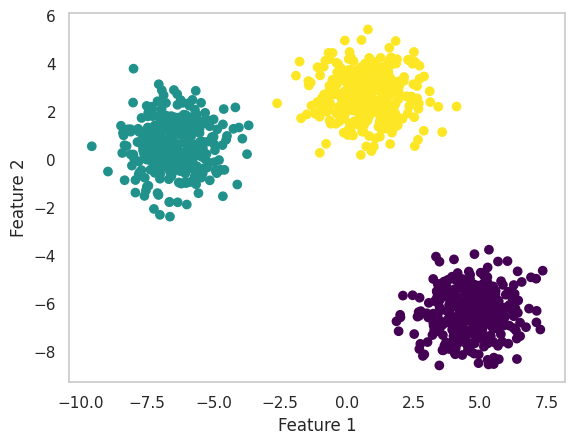

In [369]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

In [370]:
# Initialize KMeans
km = KMeans(
    n_clusters=3,     # Number of clusters you want
    init='random',    # Randomly initialize cluster centroids
    max_iter=300      # Maximum number of iterations for convergence
)

In [371]:
# Fit the model and predict cluster labels
y_km = km.fit_predict(x)

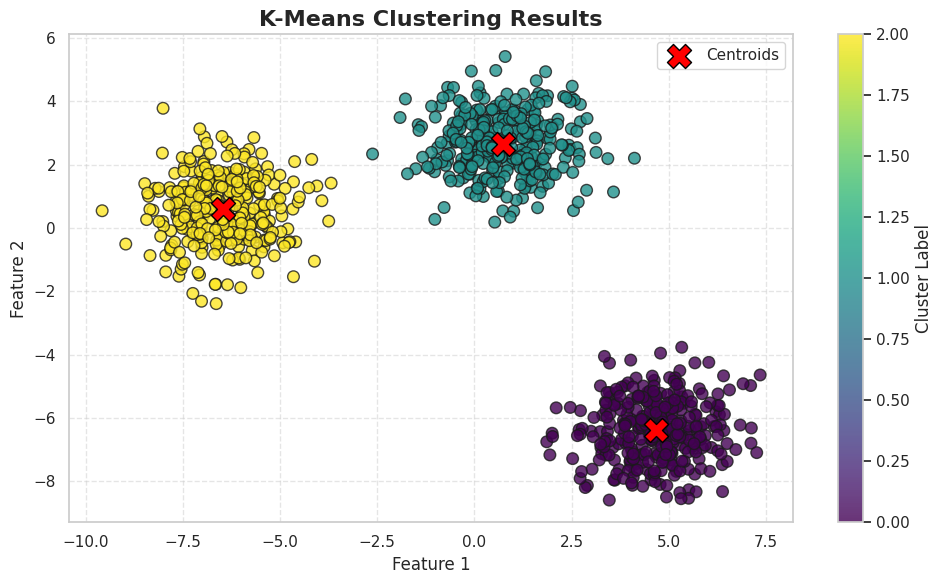

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style
sns.set(style="whitegrid")

# Create figure and axes
plt.figure(figsize=(10, 6))

# Plot data points with cluster coloring
scatter = plt.scatter(x[:, 0], x[:, 1], c=y_km, cmap='viridis', s=70, edgecolor='k', alpha=0.8)

# Plot cluster centers
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids', marker='X', edgecolor='black')

# Add title and labels
plt.title("K-Means Clustering Results", fontsize=16, weight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Optional: Colorbar for better interpretation of clusters
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

# Add legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


# Silhouette Score 
Measures how similar a point is to its own cluster vs. others. Ranges from -1 to 1. Higher is better.

**Rule of Thumb**:

- 0.7 or greater → Strong structure
- 0.5–0.7 → Reasonable structure
- < 0.3 → Weak structure or overlapping clusters

In [373]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, y_km)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.78


# Elbow Method – Find the Optimal Number of Clusters 

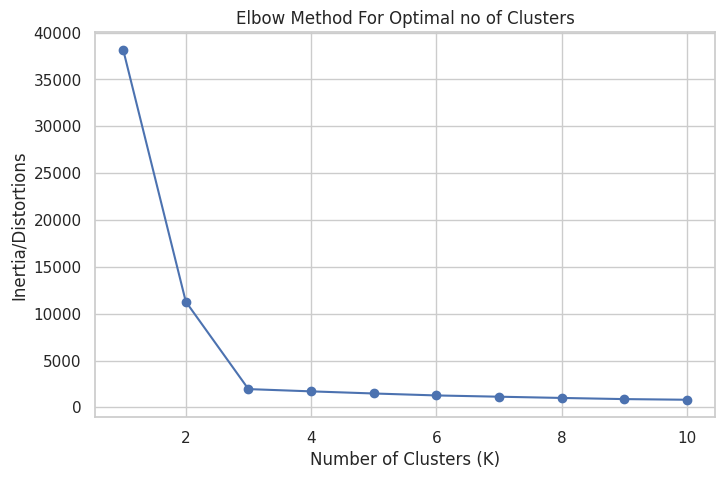

In [374]:
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia/Distortions')
plt.title('Elbow Method For Optimal no of Clusters')
plt.grid(True)
plt.show()


# Organizing Clusters as a Hierarchical Tree 

## What is Hierarchical Clustering?
Hierarchical clustering builds a tree (dendrogram) of clusters:

1. Agglomerative (Bottom-Up):
    - Starts with individual points and merges them into clusters.

2. Divisive (Top-Down):
    - Starts with one big cluster and splits it.

##  Agglomerative Clustering (Bottom Up Clustering) + Dendrogram

AgglomerativeClustering is a bottom-up hierarchical clustering algorithm:
- Each data point starts in its own cluster.
- Pairs of clusters are merged as you move up the hierarchy.



In [375]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['x', 'y', 'z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']

x = np.random.random_sample([5,3])*10  # generate 5x5 array of random numbers b/w 0 and 1.
df = pd.DataFrame(x, columns=variables, index=labels)

In [376]:
df

,x,y,z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


The **scipy.cluster.hierarchy.linkage()** function is used to compute the hierarchical clustering (i.e., how clusters should be merged) using a linkage matrix.


| Parameter          | Description                                                                                                                                                                                                                                                                                                                           |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `y`                | **Input data** — 2D array of shape `(n_samples, n_features)` or a 1D condensed distance matrix (as returned by `pdist`).                                                                                                                                                                                                              |
| `method`           | **Linkage criterion** to determine distance between clusters:<br>🔸 `'single'` – Minimum distance (nearest neighbor)<br>🔸 `'complete'` – Maximum distance (farthest point)<br>🔸 `'average'` – Average distance between points in clusters<br>🔸 `'ward'` – Minimizes the variance of merged clusters (only for Euclidean distance). |
| `metric`           | **Distance metric** used when `y` is a 2D array.<br>Examples: `'euclidean'`, `'cityblock'`, `'cosine'`, `'correlation'`, etc.<br>Ignored if `y` is a condensed distance matrix.                                                                                                                                                       |
| `optimal_ordering` | Default `False`. If `True`, the linkage matrix will be reordered to minimize the distance between successive leaves in the dendrogram.                                                                                                                                                                                                |


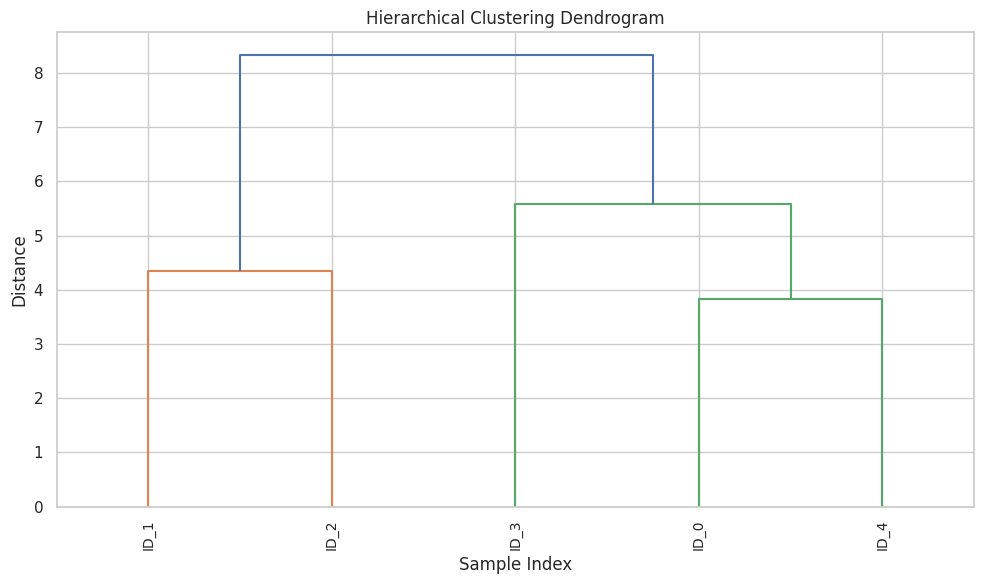

In [377]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster = linkage(df, method='ward', metric='euclidean')  # 'ward' minimizes variance

# Step 2: Plot dendrogram
plt.figure(figsize=(10, 6))

# A dendrogram is a tree-like diagram used to visualize the hierarchical clustering process — how individual points merge into clusters step by step.
dendrogram(cluster,
           truncate_mode=None,  # Show full tree (change to 'lastp' to limit branches)
           p=12,                # If truncate_mode='lastp', show only last p merges
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=0.7 * max(cluster[:, 2]),  # Highlight clusters
           labels = labels,
           show_contracted=True)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


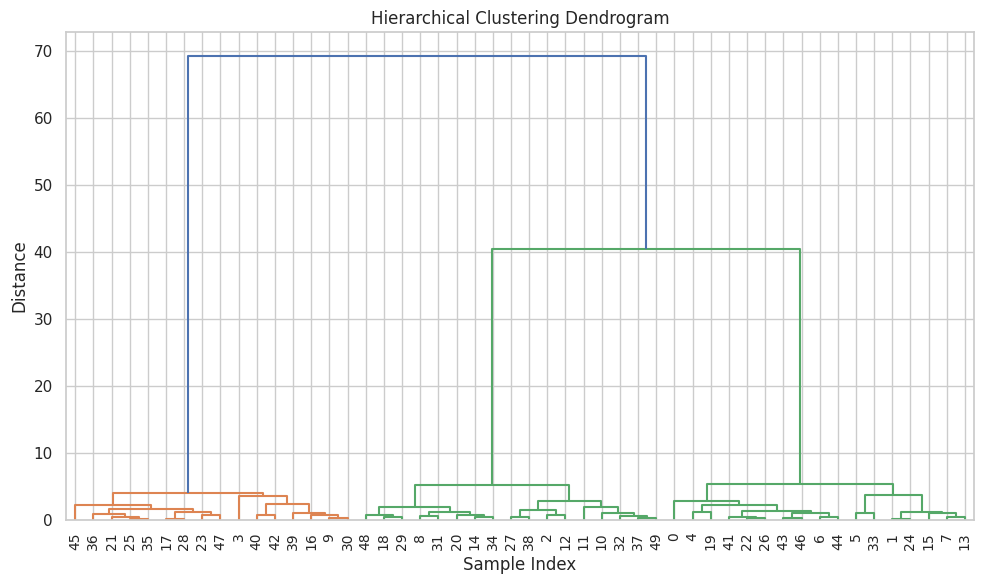

In [378]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=50, centers=3, random_state=42)

# Step 1: Create the linkage matrix
Z = linkage(X, method='ward')  # 'ward' minimizes variance

# Step 2: Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z,
           truncate_mode=None,  # Show full tree (change to 'lastp' to limit branches)
           p=12,                # If truncate_mode='lastp', show only last p merges
           leaf_rotation=90,
           leaf_font_size=10,
           color_threshold=0.7 * max(Z[:, 2]),  # Highlight clusters
           show_contracted=True)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()


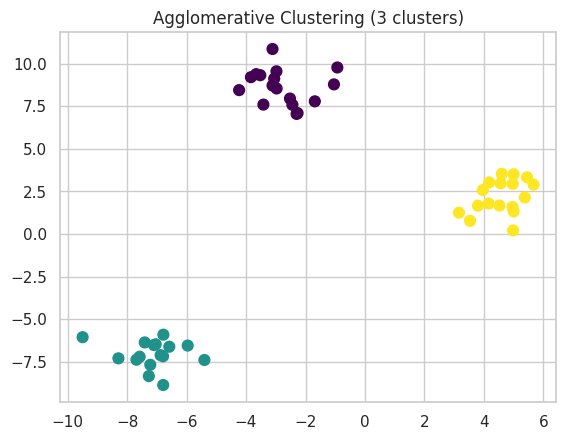

In [379]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = model.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=60)
plt.title("Agglomerative Clustering (3 clusters)")
plt.show()


# Clustering on Iris-Dataset

In [380]:
from sklearn.datasets import load_iris

In [381]:
iris = load_iris()

In [382]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [383]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names

In [384]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [385]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = scaler.fit_transform(df)

In [386]:
df

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [387]:
# inertias = []
# k_range = range(1, 11)

# for k in k_range:
#     kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
#     kmeans.fit(x)
#     inertias.append(kmeans.inertia_)

# plt.figure(figsize=(8, 5))
# plt.plot(k_range, inertias, 'bo-')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Inertia/Distortions')
# plt.title('Elbow Method For Optimal no of Clusters')
# plt.grid(True)
# plt.show()


K=1 ➤ Silhouette Score: N/A (needs at least 2 clusters)
K=2 ➤ Silhouette Score: 0.58
K=3 ➤ Silhouette Score: 0.46
K=4 ➤ Silhouette Score: 0.39
K=5 ➤ Silhouette Score: 0.34
K=6 ➤ Silhouette Score: 0.33
K=7 ➤ Silhouette Score: 0.32
K=8 ➤ Silhouette Score: 0.33
K=9 ➤ Silhouette Score: 0.36


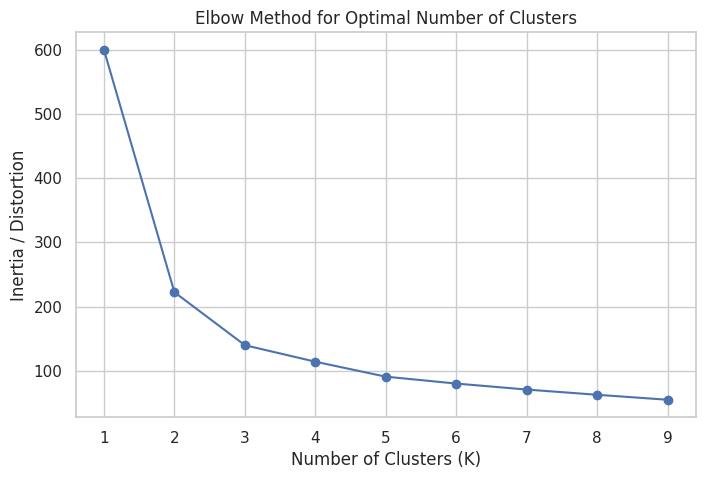

In [388]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

inertias = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_km = km.fit_predict(df)
    inertias.append(km.inertia_)
    
    if k > 1:
        score = silhouette_score(df, y_km)
        print(f"K={k} ➤ Silhouette Score: {score:.2f}")
    else:
        print(f"K={k} ➤ Silhouette Score: N/A (needs at least 2 clusters)")

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia / Distortion')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


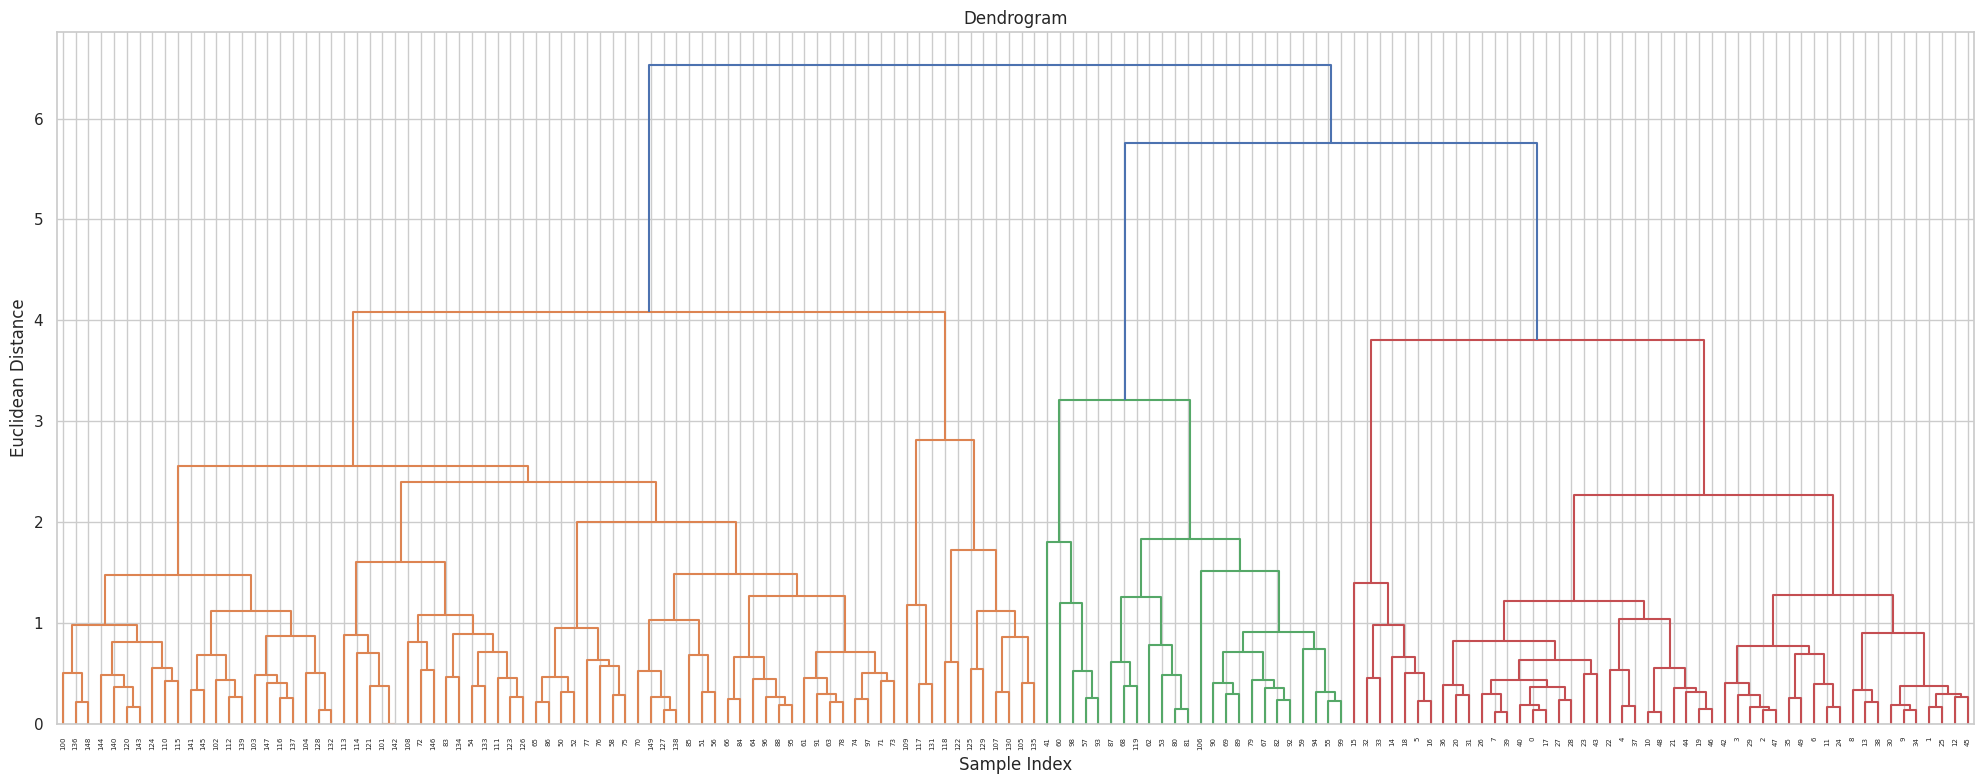

In [389]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sc

# Step 1: Compute linkage matrix
linkage_matrix = sc.linkage(df, method='complete', metric='euclidean')

# Step 2: Create figure before plotting
plt.figure(figsize=(20, 8))
plt.title('Dendrogram')
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")

# Step 3: Plot the dendrogram
sc.dendrogram(linkage_matrix)

plt.tight_layout()
plt.show()


In [390]:
from sklearn.cluster import AgglomerativeClustering 

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(df)

AgglomerativeClustering(metric='euclidean')

In [391]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

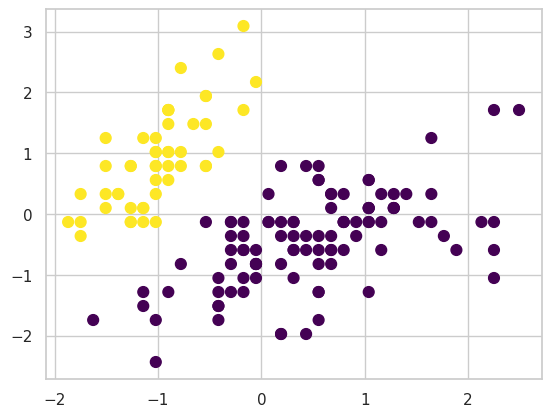

In [392]:
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='viridis', s=60)

In [393]:
from sklearn.cluster import AgglomerativeClustering 

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster.fit(df)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [394]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

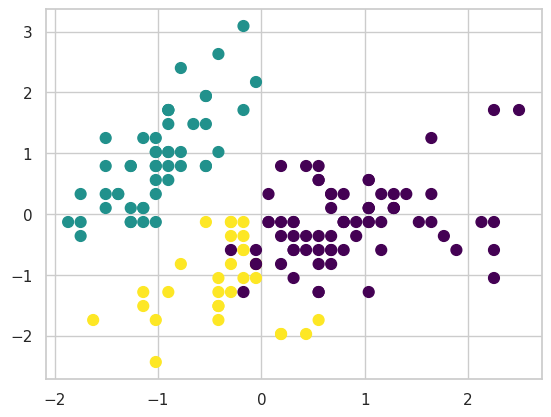

In [395]:
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='viridis', s=60)